# This is to randomly crop images using an 1:1-aspect ratio

Keras currently does not support the cropping of images using an 1:1-aspect ratio (Image Data Gernerator).  The options "width_shift_range" and "height_shift_range" are not desirable as they distort llarge parts of training images. Therefore the following code implements random cropping of squares from image data.

In [1]:
#libraries
import cv2
import numpy as np
import os.path
import ipyplot
from PIL import Image
from pathlib import Path
from random import randrange
from matplotlib import pyplot as plt

## List all tif files in directory

In [2]:
# list all tif files in (sub-)directories

dir = '.\\testdata10x\\'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(dir):
    for file in f:
        if '.tif' in file:
            files.append(os.path.join(r, file))

In [3]:
# Check if this worded
files

['.\\testdata10x\\Amorphophallus\\Bild_106.tif',
 '.\\testdata10x\\Amorphophallus\\Bild_107.tif',
 '.\\testdata10x\\Amorphophallus\\Bild_108.tif',
 '.\\testdata10x\\Amorphophallus\\Bild_109.tif',
 '.\\testdata10x\\Amorphophallus\\Bild_110.tif',
 '.\\testdata10x\\Fritillaria_th\\Bild_101.tif',
 '.\\testdata10x\\Fritillaria_th\\Bild_102.tif',
 '.\\testdata10x\\Fritillaria_th\\Bild_103.tif',
 '.\\testdata10x\\Fritillaria_th\\Bild_104.tif',
 '.\\testdata10x\\Fritillaria_th\\Bild_105.tif',
 '.\\testdata10x\\Ipomoea\\Bild_81.tif',
 '.\\testdata10x\\Ipomoea\\Bild_82.tif',
 '.\\testdata10x\\Ipomoea\\Bild_83.tif',
 '.\\testdata10x\\Ipomoea\\Bild_84.tif',
 '.\\testdata10x\\Ipomoea\\Bild_85.tif',
 '.\\testdata10x\\Kartoffel\\Bild_131.tif',
 '.\\testdata10x\\Kartoffel\\Bild_132.tif',
 '.\\testdata10x\\Kartoffel\\Bild_133.tif',
 '.\\testdata10x\\Kartoffel\\Bild_134.tif',
 '.\\testdata10x\\Kartoffel\\Bild_135.tif',
 '.\\testdata10x\\Kastanie\\Bild_126.tif',
 '.\\testdata10x\\Kastanie\\Bild_127.tif',

# Resize images

In [6]:
scale_percent = 110 # percent of original size

for g in range(len(files)):
    img = cv2.imread(files[g], cv2.IMREAD_UNCHANGED)
 
    
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

# resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 


    basename = os.path.basename(files[g]) 
    filename = basename.replace('.tif', '')
    path     = os.path.dirname(files[g])

    savename = path + "\\" + filename + "_resized.tif"
    cv2.imwrite(savename, resized)




## Randomly crop all images 9 times 

In [4]:
#open first image for size
img = Image.open(files[1])
x, y = img.size
matrix = 500
sample = 9
img.size

(2048, 1532)

In [5]:
for g in range(len(files)):
    # Load image
    img = Image.open(files[g])  

    basename = os.path.basename(files[g]) 
    filename = basename.replace('.tif', '')
    path     = os.path.dirname(files[g])
    
    # random crop 
    for i in range(sample):
        x1  = randrange(0, x - matrix)
        y1  = randrange(0, y - matrix)
        imgs = img.crop((x1, y1, x1 + matrix, y1 + matrix))

        # save
        savename = path + "\\" + filename + "_crop_" + str(i)+ ".tif"
        imgs.save(savename)

# Show results

In [57]:
# list all tif files in (sub-)directories

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(dir):
    for file in f:
        if 'Amorphophallus_00001' in file:
            files.append(os.path.join(r, file))

In [ ]:
img1 = cv2.imread(files[0])
img2 = cv2.imread(files[1])
img3 = cv2.imread(files[2])
img4 = cv2.imread(files[3])
img5 = cv2.imread(files[4])
img6 = cv2.imread(files[5])
img7 = cv2.imread(files[6])
img8 = cv2.imread(files[7])
img9 = cv2.imread(files[8])

(<matplotlib.image.AxesImage at 0x234ab9d0448>, Text(0.5, 1.0, 'Original'))

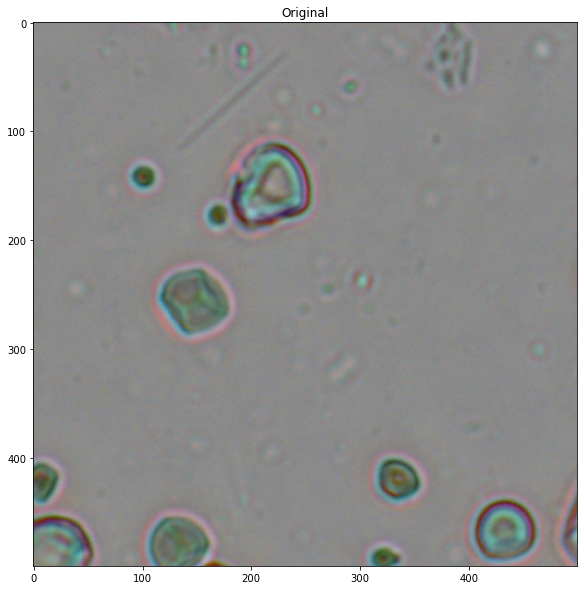

In [59]:
plt.figure(figsize = (15,10))
plt.imshow(img1),plt.title('Original')

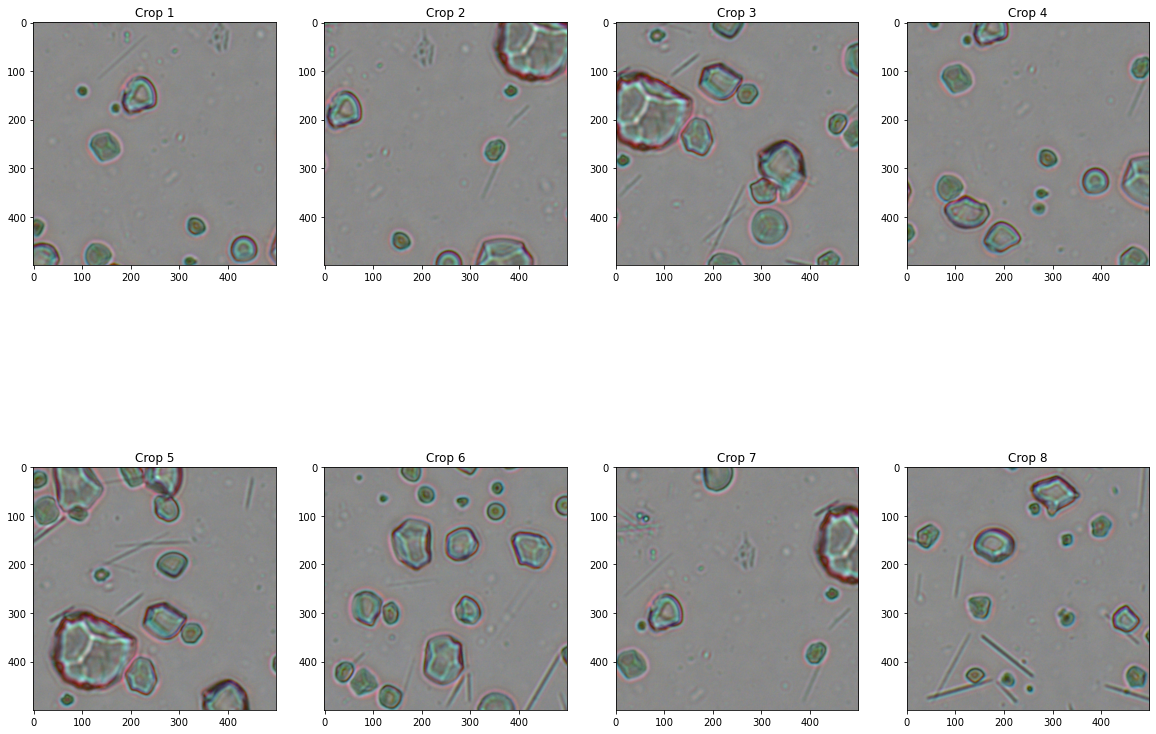

In [291]:
plt.figure(figsize = (20,15))
plt.subplot(241),plt.imshow(img2), plt.title('Crop 1')
plt.subplot(242),plt.imshow(img3),plt.title('Crop 2')
plt.subplot(243),plt.imshow(img4),plt.title('Crop 3')
plt.subplot(244),plt.imshow(img5),plt.title('Crop 4')
plt.subplot(245),plt.imshow(img6), plt.title('Crop 5')
plt.subplot(246),plt.imshow(img7),plt.title('Crop 6')
plt.subplot(247),plt.imshow(img8),plt.title('Crop 7')
plt.subplot(248),plt.imshow(img9),plt.title('Crop 8')
plt.show()